## Introduction

Hello this is part of an article on Anomoly Detection. If you are interested in learning more check it out at the link below.

https://medium.com/@bdatamethods/data-mining-anomaly-detection-with-python-1d088d93da80

## Understanding the Process

How are credit cards used and what can we understand about their use to identify credit card fraud? 

There are many ways to use credit cards. Some people use them for everyday purchases, such as gas or groceries. Other people use them for larger purchases, such as a new television or a vacation. And still others use them for emergencies, such as when their car breaks down or they have unexpected medical bills. Whatever the occasion people tend to follow certain trends in their spending. 

Aside from trends in purchases there are also trends in where and how the cards are used. A person could regularly use their card in a specific city one day or they only use the chip on the card instead of using it for online purchases.  All of these trends can be monitored to help identify potential fraud. 

If there are suddenly large purchases being made on a credit card that is usually only used for small transactions, that could be a sign of fraud. Or if the card is being used in a city where the person doesn't live or work, that could also be suspicious.

## Libraries for this project

I like to dedicate a block to the libraries used in project. This will be the first step.

In [1]:
# linear algebra 
import numpy as np

# data processing library
import pandas as pd

# pyplot from matplotlib
import matplotlib.pyplot as plt

# high level visualization package
import seaborn as sns

# import library to generate training and testing datasets
from sklearn.model_selection import train_test_split

# import library to help scale features in the datsets
from sklearn.preprocessing import StandardScaler

# import encoding library to transform data values
from sklearn.preprocessing import LabelEncoder

# import K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import confusion matrix with Yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport


## Understanding the Data
Now that we have an understanding of some nuances to credit card usage lets take a look at the data. 
The next step is loading the data into a dataframe and viewing the raw data. Our data is stored in a csv so all we have to do is read the csv into a dataframe.

In [2]:
# read csv file to dataframe
df = pd.read_csv(r'../input/credit-card-fraud/card_transdata.csv')

# display dataframe
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


There are 1 million entries and 8 columns. The 8 columns are:

* distance_from_home - Distance from home where transaction occured
* distance_from_last_transaction - Distance from where last transaction occured
* ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price
* repeat_retailer - Has historically purchased from retailer (1 = Yes / 0 = No)
* used_chip - Was chip used in transaction (1 = Yes / 0 = No)
* used_pin_number - Was PIN used to complete transaction (1 = Yes / 0 = No)
* online_order - Was transaction an online order (1 = Yes / 0 = No)
* fraud - Was transaction fraudulent (1 = Yes / 0 = No)

Based on how the data has been organized we can assume it doesn't represent a single client. It is a collection of transactions from many clients derived from a combination of data sources. 

Variables relating to distance have no unit of measure attached to them but, we can assume this data uses the same unit of measure. We care more about relations between distance and other variables.

The data type of all variabes are float. I prefer the binary variables be integer values but, this wont change the outcome so we will let them be.

Let's take a closer look at each variable.

In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


The count of each column is exactly 1 million which is a great indicator that we don't have any missing values.

Approximately 88% of transactions were with a repeat retailer. 35% used a chip. 10% used a pin. 65 % were online orders, that matches with the chip transactions. 

Only 8.7% of transactions were fraudulant. 

There's a pretty large gap between the minimum distance and max distance. The next step is grouping the distance and ratio values and generating a group so we can compare the values to the number of fraudulant cases. 

I used the percentage values from the describe() function to determine the grouping for each variable.

In [4]:
# create temporary dataframe
df_temp = df

# how distance from home groups are organized
dfh_groups = [0, 10, 25, 100, 1000, 5000, 11000]

# how distance from last transaction groups are organized
dflt_groups = [0, 1, 2, 3, 100, 1000, 5000, 12000]

# how ratio to median purchase groups are organized
rtmpp_groups = [0, .5, 1, 1.5, 2, 10, 50, 100, 200, 250, 300]

# split distance into groups
df_temp['dist_home_group'] = pd.cut(df['distance_from_home'], dfh_groups)
df_temp['dist_trans_group'] = pd.cut(df['distance_from_last_transaction'], dflt_groups)
df_temp['rtmpp_group'] = pd.cut(df['ratio_to_median_purchase_price'], rtmpp_groups)

# check number of entries with distances
print("Distance from Home ")
print(df_temp['dist_home_group'].value_counts().sort_index())
print("\n")
print("Distance from last transaction")
print(df_temp['dist_trans_group'].value_counts().sort_index())
print("\n")
print("Ratio to median purchase price")
print(df_temp['rtmpp_group'].value_counts().sort_index())

Distance from Home 
(0, 10]          500934
(10, 25]         242427
(25, 100]        206850
(100, 1000]       49303
(1000, 5000]        483
(5000, 11000]         3
Name: dist_home_group, dtype: int64


Distance from last transaction
(0, 1]           500294
(1, 2]           149981
(2, 3]            79373
(3, 100]         265092
(100, 1000]        5204
(1000, 5000]         55
(5000, 12000]         1
Name: dist_trans_group, dtype: int64


Ratio to median purchase price
(0.0, 0.5]        264451
(0.5, 1.0]        236428
(1.0, 1.5]        143620
(1.5, 2.0]         91758
(2.0, 10.0]       245829
(10.0, 50.0]       17724
(50.0, 100.0]        179
(100.0, 200.0]         9
(200.0, 250.0]         0
(250.0, 300.0]         2
Name: rtmpp_group, dtype: int64


In [5]:
# count number fraudulant transactions in distance group.
df_temp.groupby(['dist_home_group'])['fraud'].apply(lambda fraud: (fraud==1).sum())

dist_home_group
(0, 10]          35759
(10, 25]         15844
(25, 100]        13593
(100, 1000]      21996
(1000, 5000]       210
(5000, 11000]        1
Name: fraud, dtype: int64

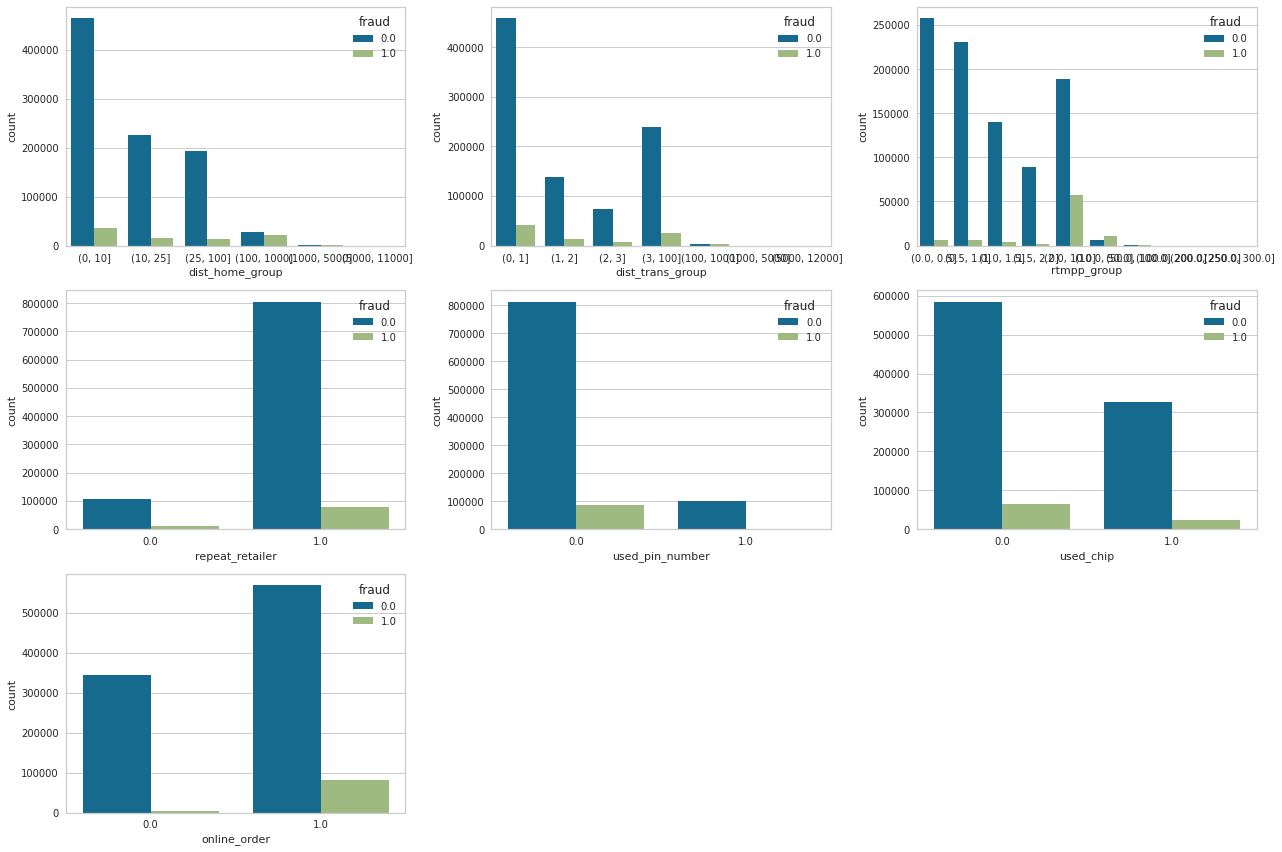

In [6]:
# Visualize the count of fraudulant transactions for columns 'dis_home_group', 
cols = [ 'dist_home_group', 'dist_trans_group', 'rtmpp_group', 'repeat_retailer', 
        'used_pin_number', 'used_chip', 'online_order']

n_rows = 3
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6,n_rows*4))

# Iterates through the matrix and places a graph
for r in range(0,n_rows):
    for c in range(0,n_cols): 
        # prevents out of range error and hides graph template
        if r == 2 and c > 0: 
            fig.delaxes(axs[r][c])
            fig.delaxes(axs[r][c+1])
            break 
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(x=df_temp[cols[i]], hue=df_temp["fraud"], ax=ax)
        ax.legend(title="fraud", loc='upper right') 
        
plt.tight_layout()   #tight_layout

Based on these graphs, there is a relation to high dollar purchases and fraudulant transactions. This makes sense. A scammer would want to extract as much money as they could before the card is blocked. 

Fraud and repeated retailers suggests scammers using a retailer they are familiar with. If making purchases in person they know the stock or they are familiar with with the online purchasing process.

It is no surprise fraudulant transactions occur without the chip or pin. Online orders allow more anonymous purchases and are quicker to process.

Next let's observe any correlation between variables. Before doing that we need to convert the distance and ratio groups to numerical values in order for the correlation matrix to process them. 

In [7]:
df_temp.dtypes

distance_from_home                 float64
distance_from_last_transaction     float64
ratio_to_median_purchase_price     float64
repeat_retailer                    float64
used_chip                          float64
used_pin_number                    float64
online_order                       float64
fraud                              float64
dist_home_group                   category
dist_trans_group                  category
rtmpp_group                       category
dtype: object

In [8]:
# Start transforming data into numerical values
labelencoder = LabelEncoder()

# encode dist_home_group column
df_temp.iloc[:,8] = labelencoder.fit_transform(df.iloc[:,8].values)

# encode dist_trans_group column
df_temp.iloc[:,9] = labelencoder.fit_transform(df.iloc[:,9].values)

# encode rtmpp_group column
df_temp.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10].values)

df_temp

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,dist_home_group,dist_trans_group,rtmpp_group
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,2,0,3
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,1,0,2
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,0,0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0,3,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,0,0,3
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,1,2,4
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,0,1,0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,0,0,0


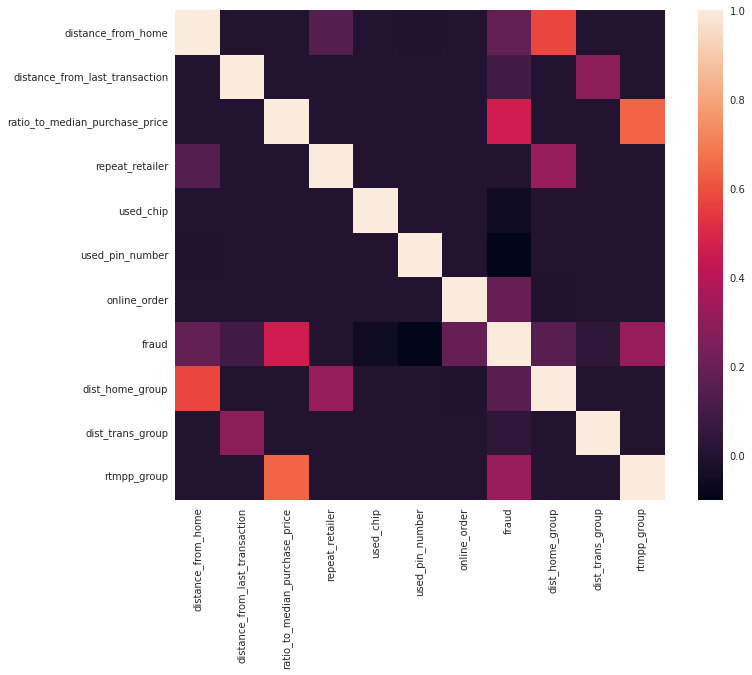

In [9]:
# Generate correlation matrix
corrmat = df_temp.corr()

# setup figure size
fig = plt.figure(figsize = (12, 9))

# assign data to a heatmap
sns.heatmap(corrmat, square = True)
plt.show()

There is very little correlation between each variable. The only thing that stands out is repeat_retailer and distance_from_home.

## Setup Data for Model Training

Frist we must split the data into a training and testing datasets. For this we use the 80/20 rule. 80% of the data is for training and 20% is for testing.

In [10]:
# split data into independent 'X' variables or features
X = df.iloc[:, 0:6].values

# create a target dataset that can be used for training and validation
Y = df.replace({'fraud': {1:'fraud', 0: 'not_fraud'}})['fraud']

# split dataset into 80% training set and 20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("completed")

completed


## Evaluation with K Nearest Neighbors

First we will evaluate the data using K Nearest Neighbors then we will run an evaluation using Logistic Regression and compare the results.

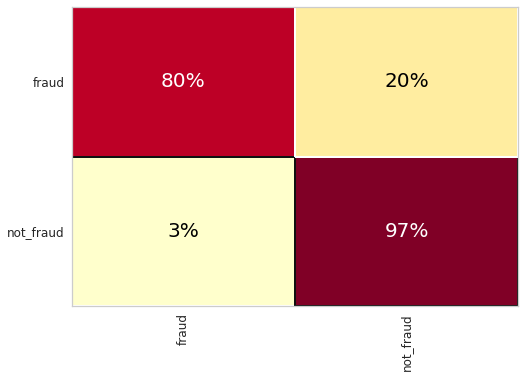

In [11]:
# Instantiate the classification model
model = KNeighborsClassifier()

# The confusion Matrix visualizer takes a model
cm = ConfusionMatrix(model, percent=True)

# fit fits the passed model. This is unnecessary if you
# pass the visualize a pre-fitted model
cm.fit(X_train, Y_train)

# To create the confusion matrix, we need some test data.
# Score runs predict() on the data dn then creates the 
# confusion matrix from scikit learn.
cm.score(X_test, Y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    


A confusion matrix is used to describe the performance of a classification model. From this we gather that 80% were correctly predicted not fraud and 97% were correctly predicted to be fraud. The other two values indicate incorrect predictions.

### KNN - Precision, Recall and F1 Score


0.95189

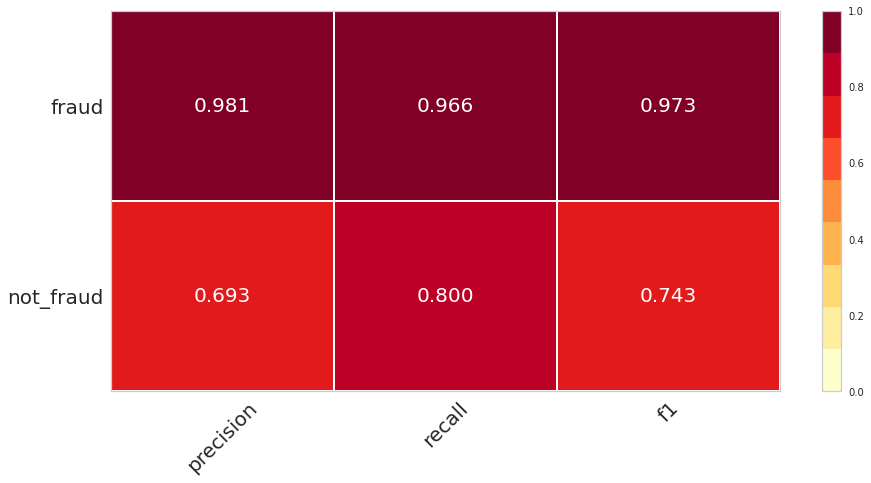

In [12]:
# set the size of the figure and the font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, Y_train)

# Evaluate the model on the test data
visualizer.score(X_test, Y_test)


### Evaluation with Logistic Regression

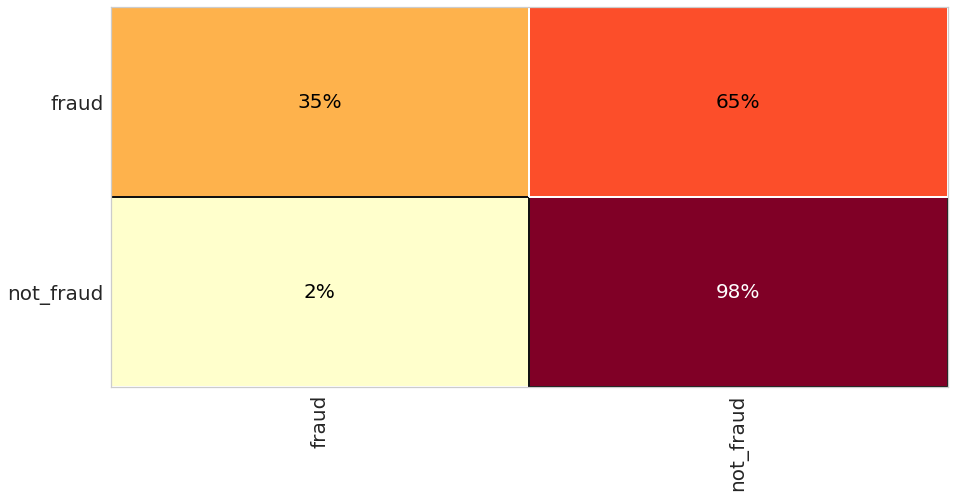

In [13]:
# Instantiate the classification model
model = LogisticRegression()

# The confusion Matrix visualizer takes a model
cm = ConfusionMatrix(model, percent=True)

# fit fits the passed model. This is unnecessary if you
# pass the visualize a pre-fitted model
cm.fit(X_train, Y_train)

# To create the confusion matrix, we need some test data.
# Score runs predict() on the data dn then creates the 
# confusion matrix from scikit learn.
cm.score(X_test, Y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

### Logistic Regression - Precision, Recall and F1 Score

0.929935

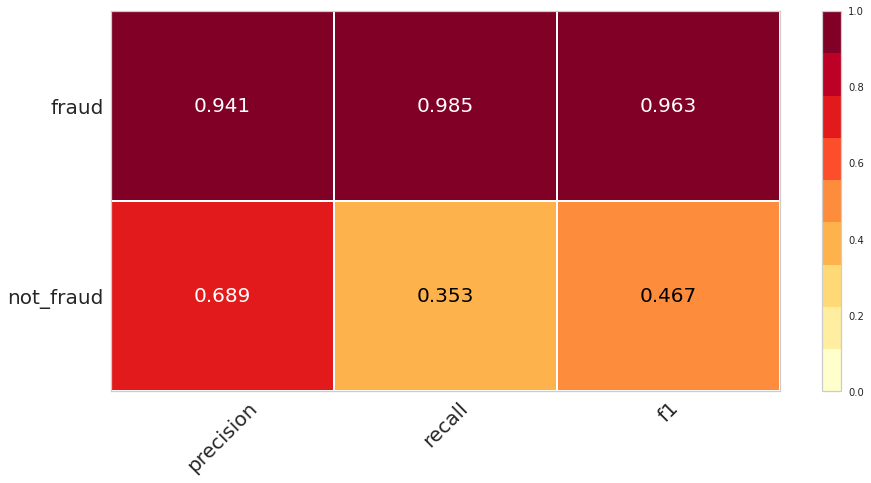

In [14]:
# set the size of the figure and the font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, Y_train)

# Evaluate the model on the test data
visualizer.score(X_test, Y_test)